# Description of columns from dataset documentation

### Attributes:-

  ---  ------         --------  
-  Row ID   -    int64  
-  Order ID   -   object 
-  Order Date  -   object 
-  Ship Date    -   object 
-  Ship Mode   -  object 
-  Customer ID   -   object 
-  Customer Name  -  object 
-  Segment  -   object 
-  Country  -   object 
-  City  -   object 
-  State  -    object 
-  Postal Code  -   float64
-  Region   -    object 
-  Product ID  -   object 
-  Category -  object 
-  Sub-Category  -    object 
-  Product Name  -  object 
-  Sales  -  float64

##### reference of the dataset:-

https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
df=pd.read_csv("superstore.csv")
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [3]:
df.shape

(9800, 18)

### From this we can see that:-
- there are 9800 rows and 18 columns present in dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### From this we can easily see that:-
- there are Two float Values , one Integer value and 15 objects are present in the dataset. 

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
df.drop(['Row ID','Order ID','Order Date','Postal Code','Product ID'],inplace=True,axis=1)

In [7]:
df.shape

(9800, 13)

In [8]:
df.columns

Index(['Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [9]:
df['Ship Date'].nunique()

1326

In [10]:
df.drop(['Ship Date','Customer ID','Customer Name','Product Name'],inplace=True,axis=1)

In [11]:
df.shape

(9800, 9)

## Checking the null Values in the data.

In [12]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
dtype: int64

##### There is  no null values are present in the dataset.

## Checking the Duplicate Values in the Dataset.

In [13]:
df.duplicated().sum()

62

##### There are 62 duplicate values are present in the dataset.

##### Then we can drop the duplicate values in the data.

In [14]:
df.drop_duplicates(inplace= True)

In [15]:
df.duplicated().sum()

0

###### So There is no duplicate values are left in the dataset.

In [16]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales'],
      dtype='object')

# EDA Part

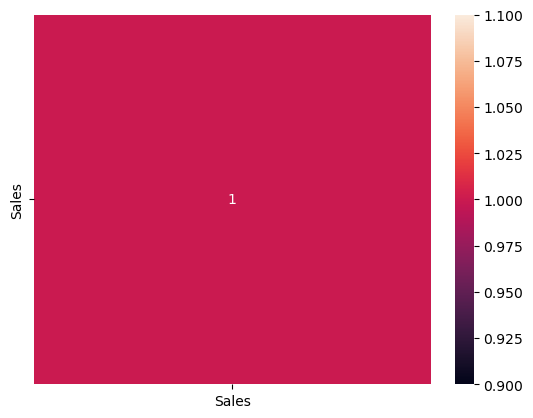

In [17]:
sns.heatmap(df.corr(),annot=True)
plt.show()

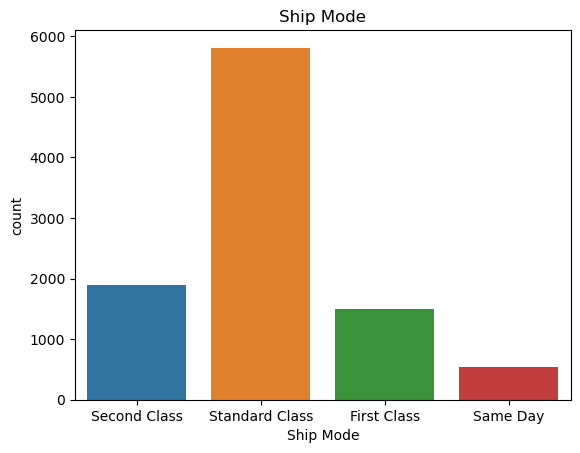

In [18]:
sns.countplot(data=df,x='Ship Mode')
plt.title('Ship Mode')
plt.show()

### From the above plot we can easily see that:-
-  Items can be send through the Standard class are more.

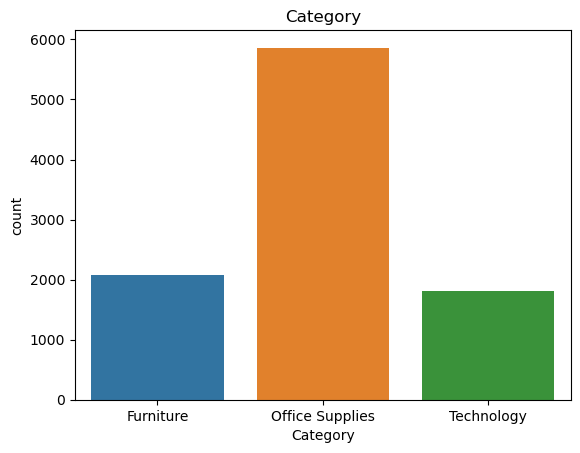

In [19]:
sns.countplot(data=df,x='Category')
plt.title('Category')
plt.show()

##### From this plot we can easily see that-
- In the Category of the Items The Office supplies are send to more. 

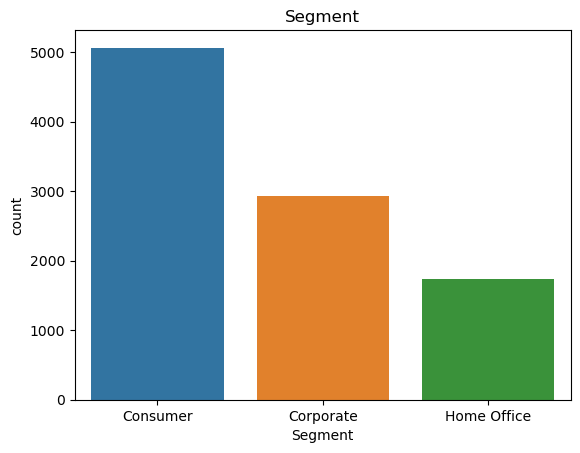

In [20]:
sns.countplot(data=df,x='Segment')
plt.title('Segment')
plt.show()

##### From the above plot we can easily see that:-
- More Consumer products are send than the Corporate Segment and  the home office.

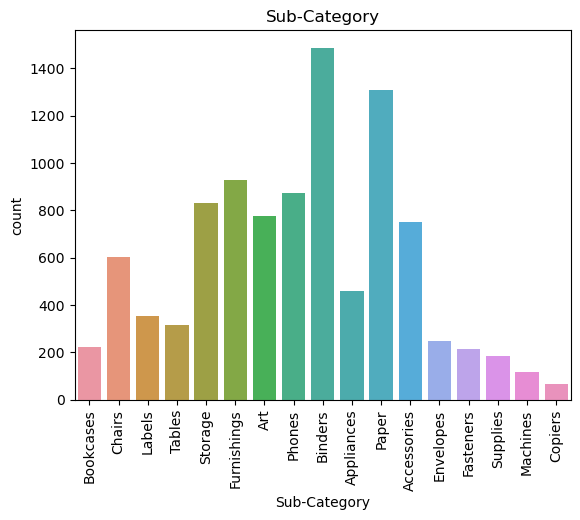

In [21]:
sns.countplot(data=df,x='Sub-Category')
plt.title('Sub-Category')
plt.xticks(rotation=90)
plt.show()

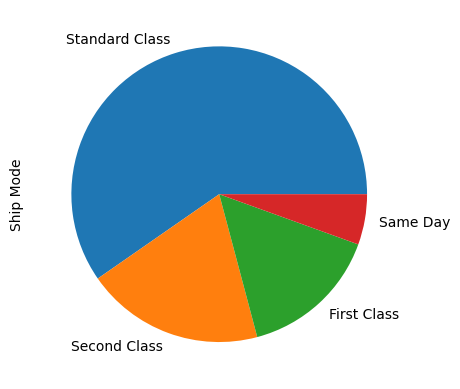

In [22]:
df["Ship Mode"].value_counts().plot.pie()
plt.show()

##### From the above plot we can easily see that:-
- Items can be send through Standard Class are more.

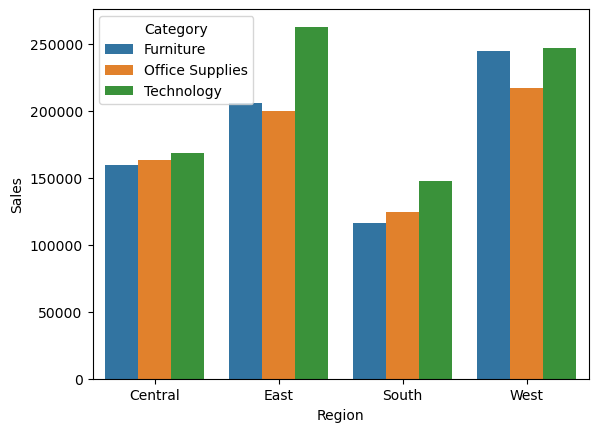

In [23]:
Category  = df.groupby(['Region',"Category"], as_index=False).agg({'Sales': "sum"})
Category.head
#so.Plot(data= Region, x="Region", y= "Sales", alpha = 'Category').add(so.Bar())
sns.barplot(data=Category, x="Region", y="Sales", hue="Category")
plt.show()

#### From the above plot we can easily see that:-
- In East region Technology have more sales. 
- In South region Furniture,Office Supplies,Technology have less sales .

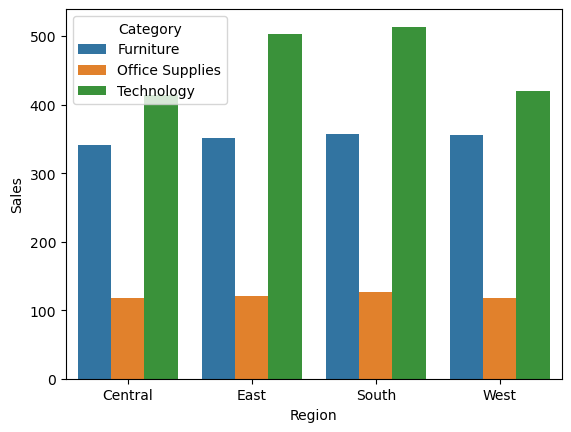

In [24]:
Category  = df.groupby(['Region',"Category"], as_index=False).agg({'Sales': "mean"})
Category.head
#so.Plot(data= Region, x="Region", y= "Sales", alpha = 'Category').add(so.Bar())
sns.barplot(data=Category, x="Region", y="Sales", hue="Category")
plt.show()

#### From the above plot we can easily see that:-
- In All the regions Technology have high sales and specially In South region Technology have more sale.
- In all the regions Office Supplies have less sales.

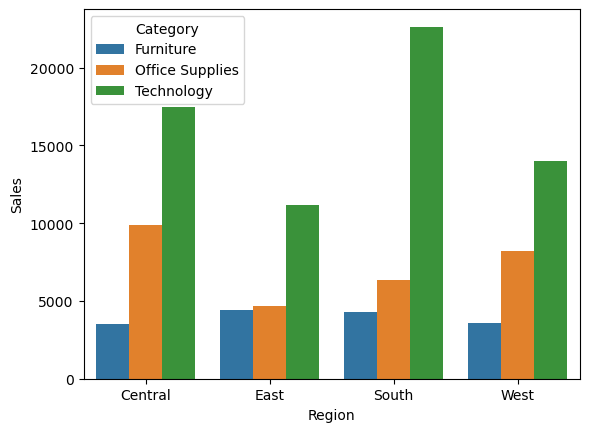

In [25]:
Category  = df.groupby(['Region',"Category"], as_index=False).agg({'Sales': "max"})
Category.head
#so.Plot(data= Region, x="Region", y= "Sales", alpha = 'Category').add(so.Bar())
sns.barplot(data=Category, x="Region", y="Sales", hue="Category")
plt.show()

#####  From the above plot we can easily see that:-
- In South region Technology have maximum sales.
- In West Region Furniture have less sale.

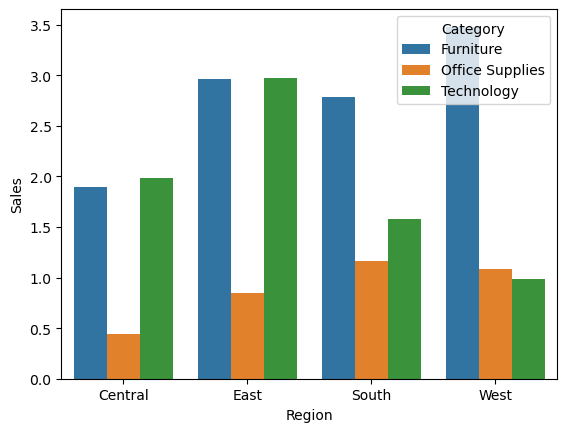

In [26]:
Category  = df.groupby(['Region',"Category"], as_index=False).agg({'Sales': "min"})
Category.head
#so.Plot(data= Region, x="Region", y= "Sales", alpha = 'Category').add(so.Bar())
sns.barplot(data=Category, x="Region", y="Sales", hue="Category")
plt.show()

#### From the above plot we can easily see that:-
- In the West region Technolgy have less sale than Office supply and Furniture.

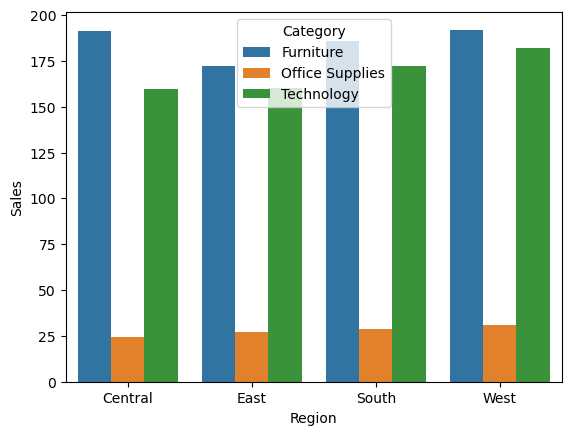

In [27]:
Category  = df.groupby(['Region',"Category"], as_index=False).agg({'Sales': "median"})
Category.head
#so.Plot(data= Region, x="Region", y= "Sales", alpha = 'Category').add(so.Bar())
sns.barplot(data=Category, x="Region", y="Sales", hue="Category")
plt.show()

#### From the above plot we can easily see that:-
- In all the Regions Furniture have high values than the others.

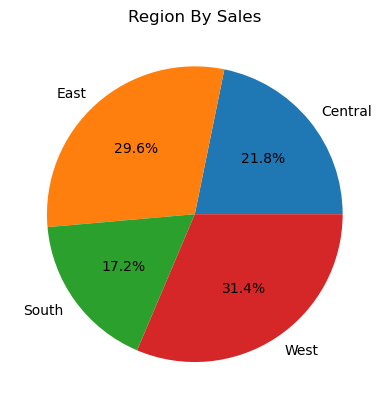

In [28]:
Region = df.groupby(['Region'], as_index=False).agg({'Sales': "sum"})
Region.head
plt.pie(Region['Sales'],labels=Region['Region'], autopct='%1.1f%%')
plt.title("Region By Sales")
plt.show()

#### In the pie chart we can easily see that:-
- The West Region have high Sales.

##  ----------------------------- Thank You --------------------------------------------